In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import barnard_exact, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [3]:
transplantation_date = pd.to_datetime('2024-02-02')

data = pd.read_excel('data.xlsx')
data['height_30d_date'] = pd.to_datetime(data['height_30d_date'], format="%d/%m/%Y")
display(data.head())
display(data.info())

,plant_id,bed_id,bed_type,height_30d_mm,height_30d_date,survived_to_harvest
0,1,A,Dig,30.0,2024-04-25,NaN
1,2,A,Dig,80.0,2024-04-25,NaN
2,3,B,No-dig,230.0,2024-04-25,NaN
3,4,B,No-dig,80.0,2024-04-25,NaN
4,5,A,Dig,60.0,2024-04-25,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   plant_id             14 non-null     int64         
 1   bed_id               14 non-null     object        
 2   bed_type             14 non-null     object        
 3   height_30d_mm        13 non-null     float64       
 4   height_30d_date      14 non-null     datetime64[ns]
 5   survived_to_harvest  1 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 804.0+ bytes


None

# Survive to harvest

In [8]:
survival_contingency = pd.crosstab(data.bed_type, data.survived_to_harvest, dropna=False)
survival_contingency

survived_to_harvest,0.0,NaN
bed_type,,
Dig,0,6
No-dig,1,7


In [9]:
barnard_exact(survival_contingency, alternative='two-sided', pooled=False, n=32)
# Barnard becuase it is more powerful than Fisher and only one margin is fixed
# unpooled as unknown if variences are the same for each group. Pooling assumes the same varience. https://cran.r-project.org/web/packages/Exact/Exact.pdf , https://stats.stackexchange.com/questions/169864/which-test-for-cross-table-analysis-boschloo-or-barnard

BarnardExactResult(statistic=-3.338091841585121, pvalue=0.7094726562499989)

# Height

In [11]:
# TODO - plot resutls
#sns.stripplot(data=data, y='height_30d_mm', x='height_day_str_1', hue='bed_type', jitter=True)
#plt.show()

In [13]:
#30 (34) day
# excludes dead plants
a = data[((data['bed_type']=='Dig')&(data['height_30d_mm'].isna()==False))]['height_30d_mm']
b = data[((data['bed_type']=='No-dig')&(data['height_30d_mm'].isna()==False))]['height_30d_mm']
ttest_ind(a=a, b=b, equal_var=True, nan_policy='raise', permutations=None, alternative='two-sided', trim=0)

TtestResult(statistic=-3.529045728079297, pvalue=0.004722752598174047, df=11.0)

In [24]:
# mean
# TODO, need to work out what day the measurement was actually taken
print(f"""Means at 30d:
    Dig: {a.mean()} mm
    No-dig: {b.mean()} mm
    Relative mean height: {b.mean()/a.mean()}
""")

Means at 30d:
    Dig: 78.33333333333333 mm
    No-dig: 192.85714285714286 mm
    Relative mean height: 2.462006079027356



c:\Users\acbre\anaconda3\envs\default\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


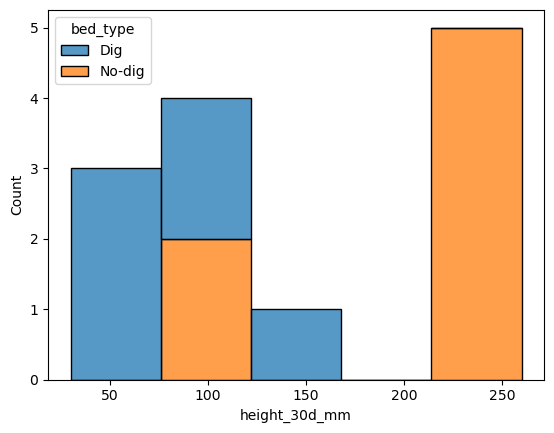

In [27]:
sns.histplot(data=data, x='height_30d_mm', hue='bed_type', multiple='stack')
plt.show()